# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/test.p'
testing_file = './traffic-signs-data/valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.utils import shuffle

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
classes = np.unique(np.hstack([y_train, y_valid]))
n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

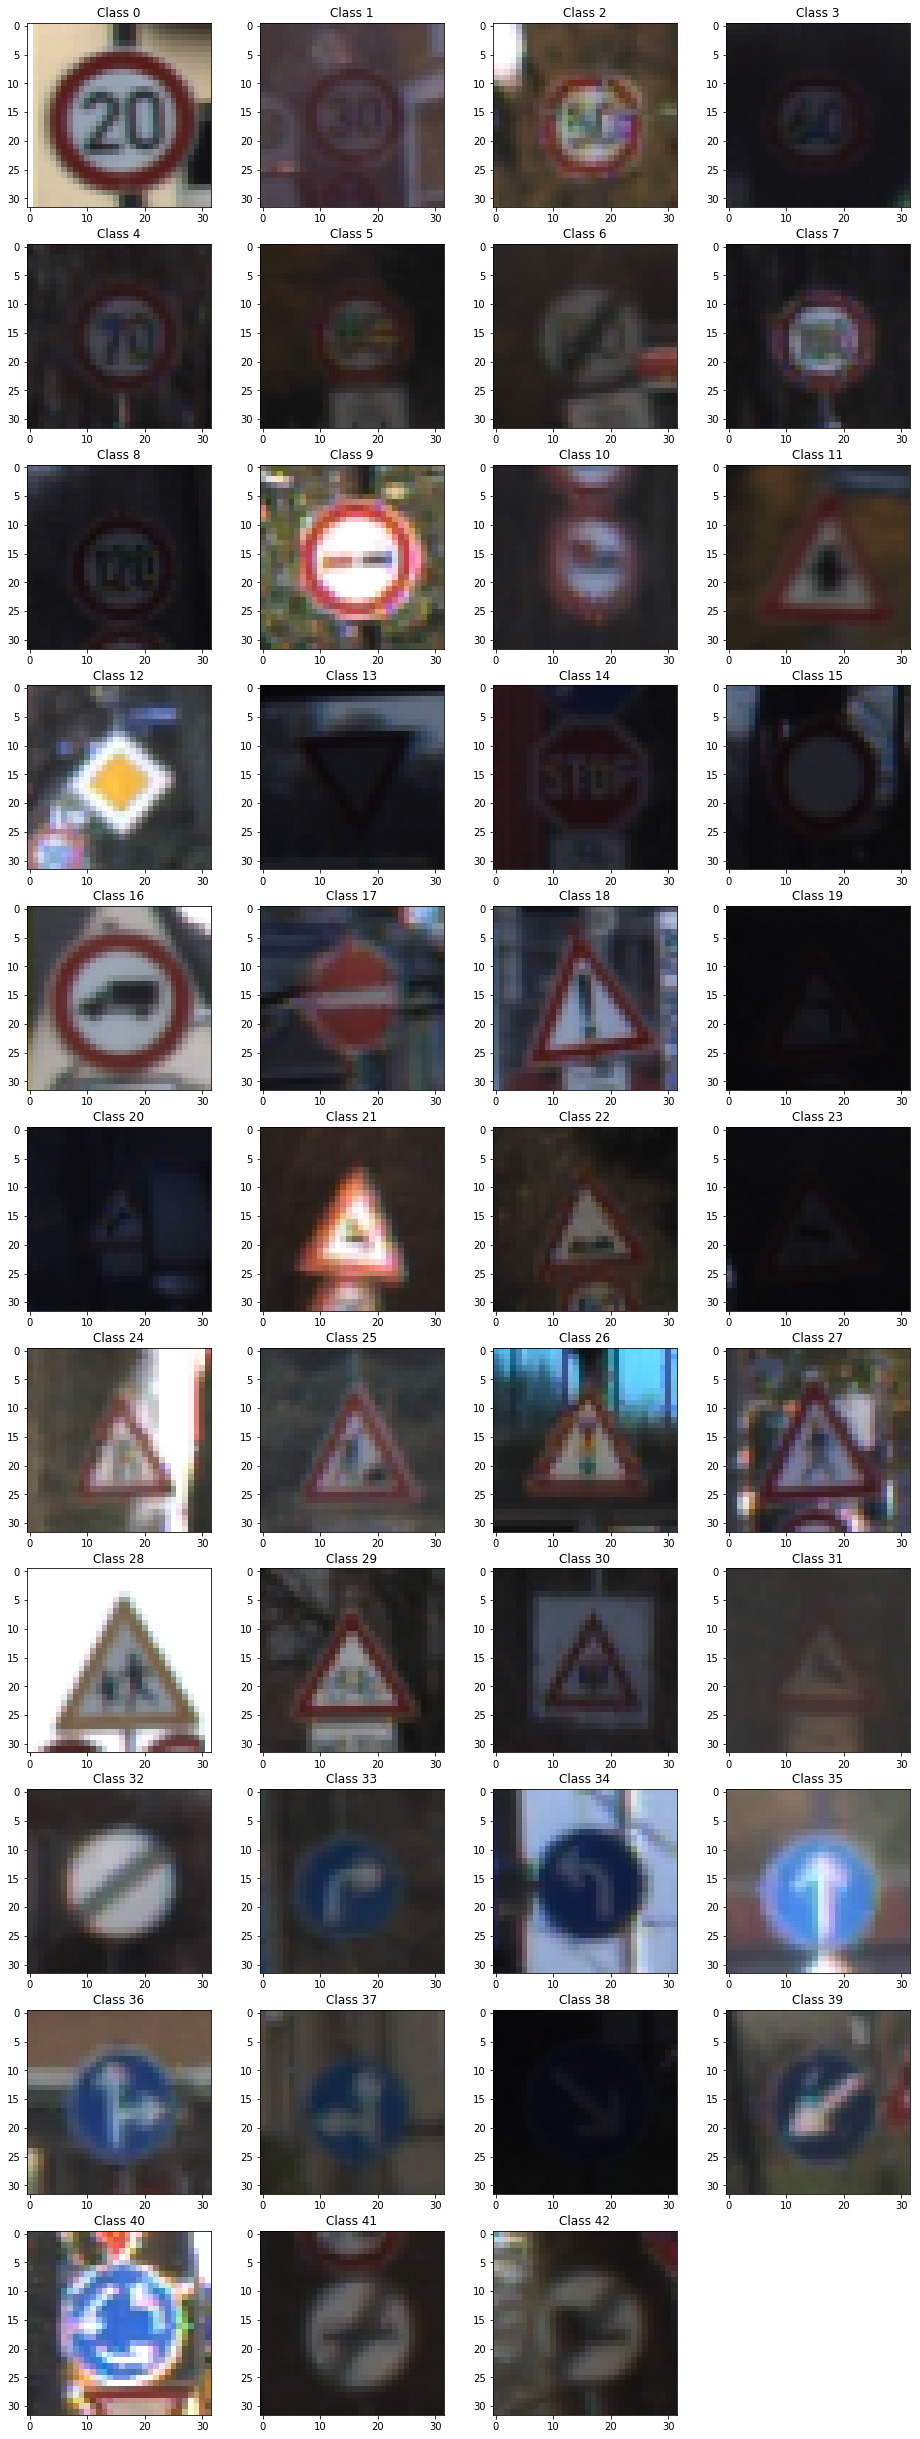

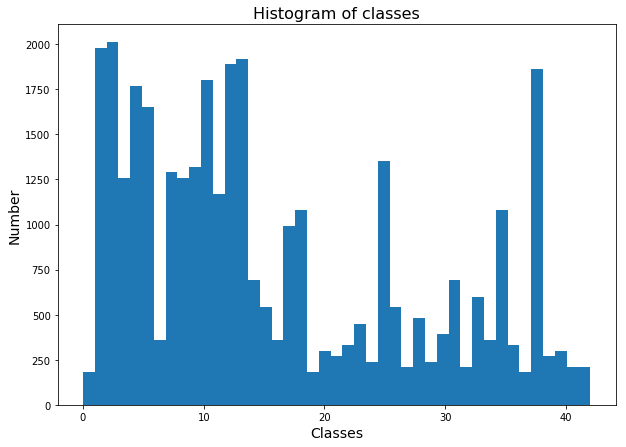

In [4]:
# plot the first image in training data for each class
fig = plt.figure(figsize=(16,44));
for i in list(range(n_classes)):
    plt.subplot(11,4,i+1);
    plt.imshow(np.squeeze(X_train[np.where(y_train == i)[0][0],:,:,:]));
    plt.title('Class ' + str(i),fontsize = 12);
    plt.savefig('./img_writeup/raw-class-'+str(i)+'.png')

# plot the histogram of all classes in training data
fig = plt.figure(figsize = (10,7));
plt.hist(y_train,bins=43);
plt.xlabel('Classes',fontsize = 14);
plt.ylabel('Number', fontsize = 14);
plt.title('Histogram of classes', fontsize = 16);
plt.savefig('./img_writeup/hist_raw.png')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

A series of preprocessing images has been applied to the original dataset. Functions for preprocessing are defined as follows.

In [5]:
# normalizing an image data set
def NormImg(raw_img):
    '''
    raw_img: an input 4D array of raw images (nimg, nrow, rcol, rdepth)
    '''
#     norm_img = np.ndarray(shape = raw_img.shape, dtype = np.float32)
    norm_img = (raw_img-128.0)/128.0
    return norm_img

# convert RGB images to gray scale
def RGB2GRY(raw_img):
    '''
    convert the image from RGB to grayscale
    '''
    gry_img = cv2.cvtColor(raw_img,cv2.COLOR_RGB2GRAY)
    return gry_img

# Histogram equalization on grayscale images
def HistEq(raw_img, type = 'GRAY'):
    '''
    equalize the histogram of an given image. The image can be grayscale or RGB
    '''
    if type == 'GRAY':
        eq_img = cv2.equalizeHist(raw_img)
    elif type =='RGB':
        # from IPython.core.debugger import Tracer; Tracer()()
        yuv_img = cv2.cvtColor(raw_img, cv2.COLOR_RGB2YUV)
        # equalize the histogram of the Y channel
        yuv_img[:,:,0] = cv2.equalizeHist(yuv_img[:,:,0])
        # convert the YUV image back to RGB format
        eq_img = cv2.cvtColor(yuv_img, cv2.COLOR_YUV2RGB)
    return eq_img



# Image augmentation
def ImgAug(raw_img,fv = 1.0,theta = 0.0,scale=1.0,ftxy = (0.0, 0.0),fshear = np.float32(((1.0,1.0),(1.0,1.0),(1.0,1.0)))):
    '''
    change the brightness in HSV space and conver the transformed image back to RGB
    rotate the new RGB image, then translate
    theta: degree of rotation
    scale: isotropic rescaling factor to resize the image
    ftxy = (ftx, fty): ratio of shifting in x and y directions. tx = round(nx*ftx), ty = round(ny*fty)
    '''
    # change the brightness of the image
    hsv_img = np.array(cv2.cvtColor(raw_img,cv2.COLOR_RGB2HSV),dtype=np.float32)
    hsv_img[:,:,2] = hsv_img[:,:,2]*fv
    hsv_img[:,:,2][hsv_img[:,:,2]>255.0] = 255.0
    hsv_img = np.array(hsv_img,dtype=np.uint8)
    b_img = cv2.cvtColor(hsv_img,cv2.COLOR_HSV2RGB)

    # get the size of the img for transformation
    nrow,ncol,_ = b_img.shape
    # affine transformation
    # choose 3 fixed points in the image for transformation
    pt1 = np.float32([[10,10],[10,22],[22,10]])
    # calculate the shear offset with given shear range factor fshxy = (fshx,fshy)
    pt2 = np.multiply(pt1,fshear)
    # perform affine transform
    S = cv2.getAffineTransform(pt1,pt2)
    shear_img = cv2.warpAffine(b_img,S,(ncol,nrow))
    
    # rotate and rescale the image
    center = (ncol/2.0,nrow/2.0)
    M = cv2.getRotationMatrix2D(center, theta, scale)
    rotated_img = cv2.warpAffine(shear_img,M,(ncol,nrow))
    
    # translate the rotated image
    M = np.float32([[1, 0, np.float32(ncol)*ftxy[0]], [0, 1 , np.float32(nrow)*ftxy[1]]])
    shifted_img = cv2.warpAffine(rotated_img,M,(ncol,nrow))
    
    return shifted_img

# define a funciton to sample values for parameters of the image augmentation function
def AugmParams(rfbrightness = (0.1,2.5),rtheta = (-180.0, 180.0), rscale = (0.5, 1.5), 
               rftx = (-0.2, 0.2), rfty = (-0.2, 0.2), size = 1 , rfshearxy = (0.9, 1.1)):
    fbrightness = np.float32(np.random.uniform(rfbrightness[0],rfbrightness[1]))
    thetas = np.float32(np.random.uniform(rtheta[0],rtheta[1],size))
    scales = np.float32(np.random.uniform(rscale[0],rscale[1],size))
    ftxys = list(zip(np.float32(np.random.uniform(rftx[0],rftx[1],size)),np.float32(np.random.uniform(rfty[0],rfty[1],size))))
    fshearxys = np.float32(np.random.uniform(rfshearxy[0],rfshearxy[1],(size,3,2)))
    return fbrightness, thetas, scales, ftxys, fshearxys

Augment the dataset

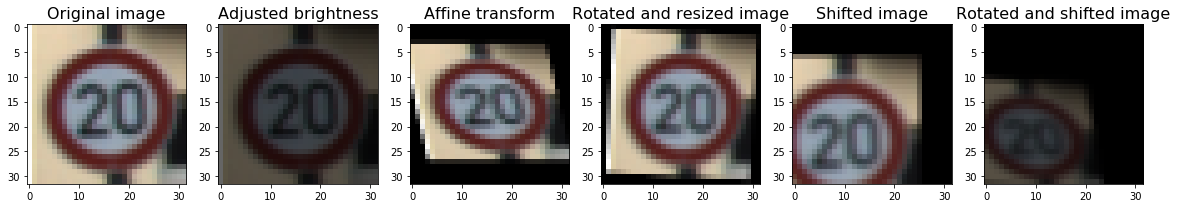

In [6]:
# Demonstrate image augmentation
raw_image = X_train[np.where(y_train == 0)[0][0],:,:,:]

fv = 0.4
theta = -3.0
scale = 0.9
ftxy = (-0.2, 0.2)
fshearxy = np.float32([[0.9,1.1],[1.1,0.9],[0.9,1.1]])

# brightness adjusted image
b_image = ImgAug(raw_image,fv = fv)

# affine transform
shear_image = ImgAug(raw_image, fshear = fshearxy)

# rotate the image for -45 (clockwise) degree around the center and rescale the image to 80% of the original size
rotated_image = ImgAug(raw_image, theta=theta, scale = scale)

# translate the image for factors 6 pixels (0.2*nx) toward -x direction, and 3 pixels (0.1*ny) toward y direction
shifted_image = ImgAug(raw_image, ftxy = ftxy)

# combined rotation and shift on the image
trans_image = ImgAug(raw_image, fv=fv,theta=theta, scale = scale, ftxy = ftxy, fshear = fshearxy)

# plot the original image vs images with different transformation
fig = plt.figure(figsize = (20,16));
# original image
plt.subplot(1,6,1)
plt.imshow(raw_image);
plt.title('Original image', fontsize = 16);
plt.imsave('./img_writeup/aug-demo-raw.png',raw_image)
# image with adjusted brightness
plt.subplot(1,6,2)
plt.imshow(b_image);
plt.title('Adjusted brightness', fontsize = 16);
plt.imsave('./img_writeup/aug-brightness.png',b_image)
# image with affine transformation
plt.subplot(1,6,3)
plt.imshow(shear_image);
plt.title('Affine transform', fontsize = 16);
plt.imsave('./img_writeup/aug-shear.png',b_image)
# rotated image
plt.subplot(1,6,4)
plt.imshow(rotated_image);
plt.title('Rotated and resized image', fontsize = 16);
plt.imsave('./img_writeup/aug-rotated-resized.png',rotated_image)
# shifted image
plt.subplot(1,6,5)
plt.imshow(shifted_image);
plt.title('Shifted image', fontsize = 16);
plt.imsave('./img_writeup/aug-shifted.png',shifted_image)
# combination of rotation and transformation
plt.subplot(1,6,6)
plt.imshow(trans_image);
plt.title('Rotated and shifted image', fontsize = 16);
plt.imsave('./img_writeup/aug-combined-trans.png',trans_image)

In [7]:
# Augment training data for classes with record less than n_target
# the augmentation includes intensity, resize, rotate, horizontal and verical rotate
from collections import Counter
from random import randint

# count the size of each class
class_count = Counter(y_train)
# For each class, we extend the record size of each class by a factor of 5
f_class = 5
# augmented images are stored at here
augm_imgs = []
augm_y = []

# loop all classes
for key,n in class_count.items():
    # if the size of this class is less than our target size, we are going to augment record in this class
    diff = n*f_class - n
    if diff>0:
        # get all images in this class
        i_imgs = X_train[np.where(y_train == key)[0],:,:,:]
        # sample parameters for the augmentation
#         fv, thetas, scales, ftxys = AugmParams(rtheta=(0.0,0.0),rscale = (1.0,1.0),size = diff)
        fv, thetas, scales, ftxys, fshearxys = AugmParams(rtheta=(-3.0,3.0),rscale = (0.9,1.1),size = diff)
        # generate transformed images
        for i in list(range(diff)):
            # sample a random image from original images in this class
            jj = randint(0,n-1)
#             from IPython.core.debugger import Tracer; Tracer()()
            raw_img = i_imgs[jj,:,:,:].copy()
            # generate a new image using the sampled original image
            trans_img = ImgAug(raw_img,fv,thetas[i],scales[i],ftxys[i], fshearxys[i,:,:])
            # store the image in a list
            augm_imgs.append(trans_img)
        augm_y.append(np.full((diff,),key))
X_train_augm = np.stack(augm_imgs,axis=0)
y_train_augm = np.concatenate(augm_y,axis=0)
del augm_imgs,augm_y

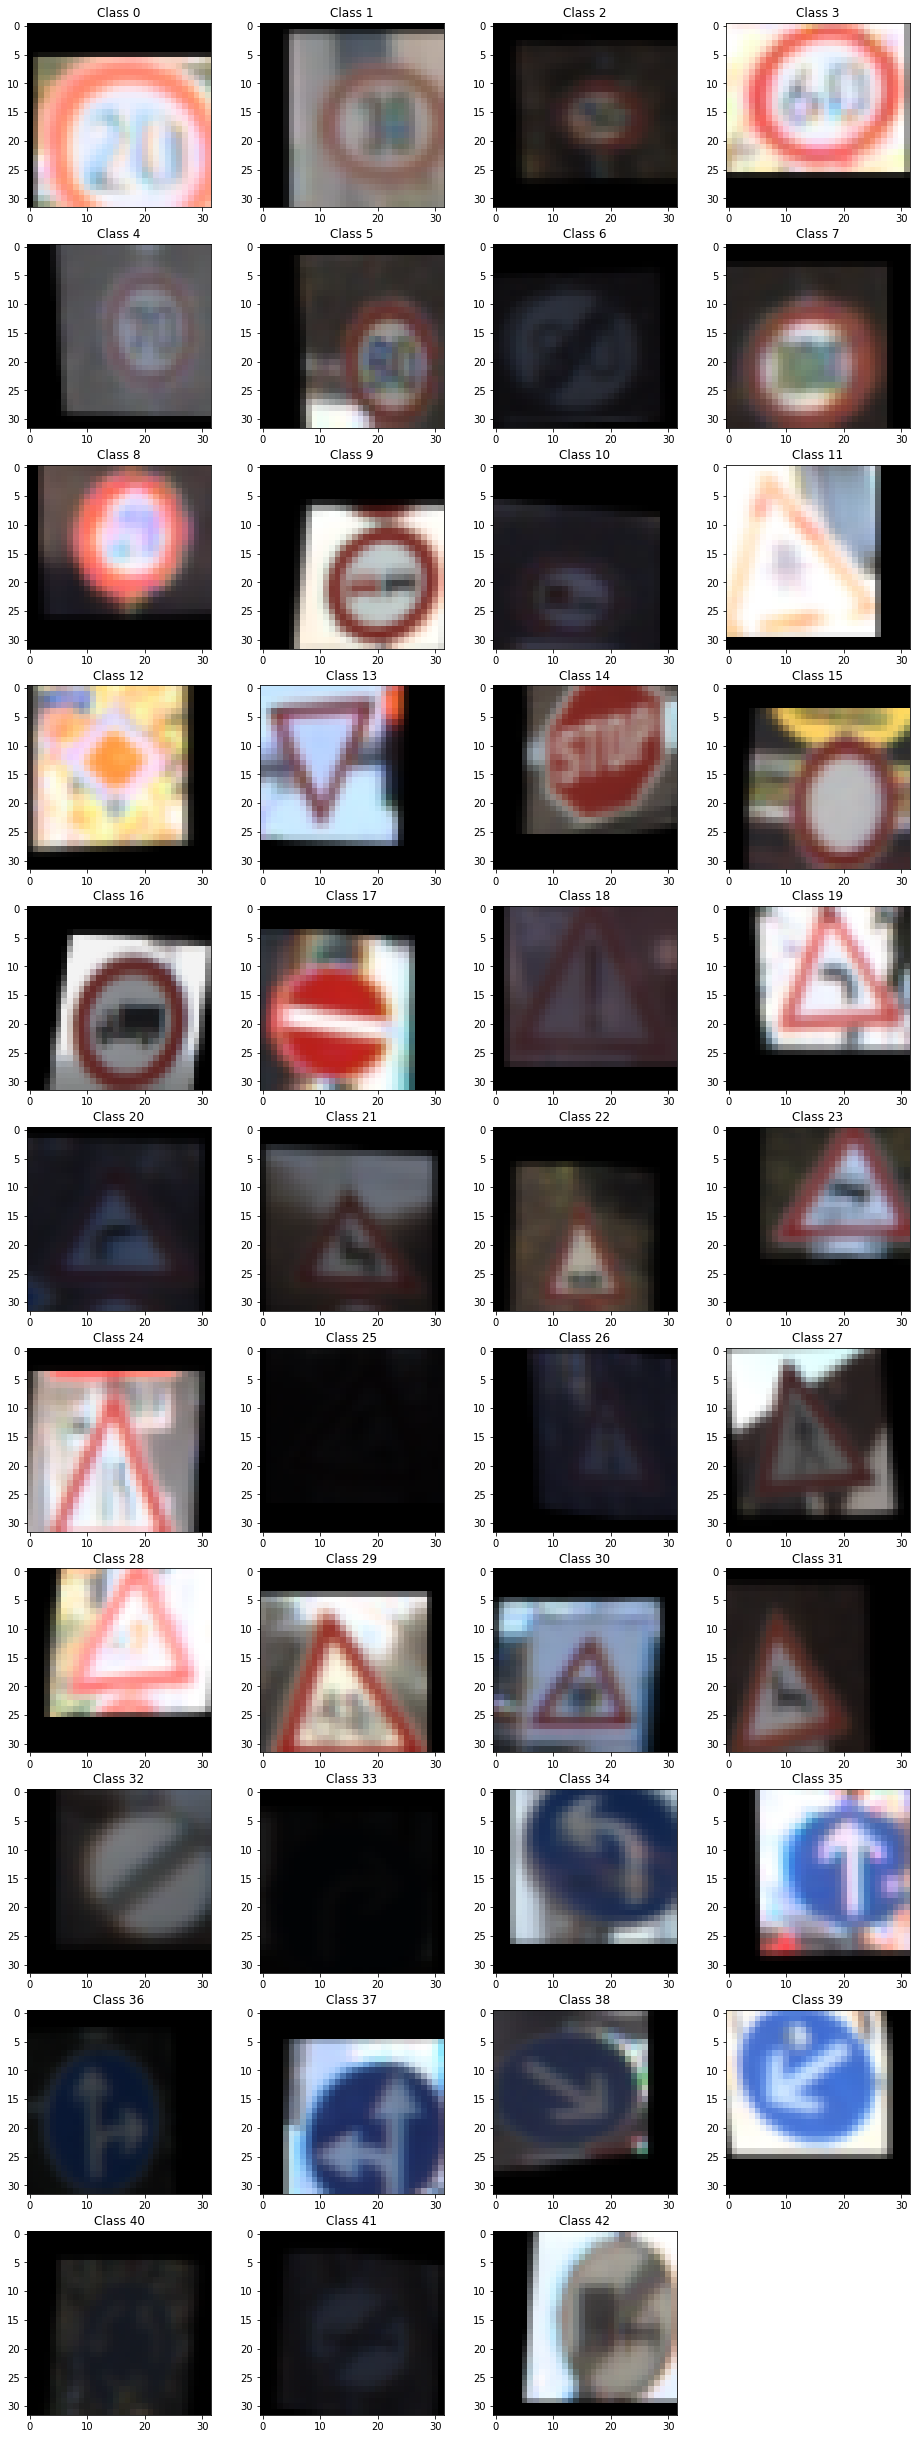

In [8]:
# plot the first image in training data for each class
fig = plt.figure(figsize=(16,44));
for i in list(range(n_classes)):
    plt.subplot(11,4,i+1);
    plt.imshow(np.squeeze(X_train_augm[np.where(y_train_augm == i)[0][0],:,:,:]));
    plt.title('Class ' + str(i),fontsize = 12);
#     plt.savefig('./img_writeup/augm-class-'+str(i)+'.png')

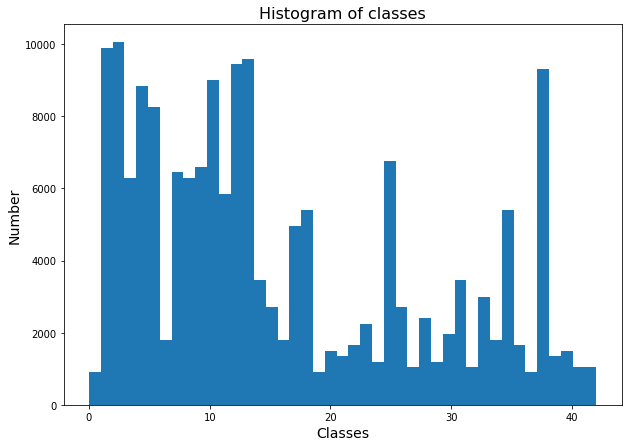

In [9]:
# # plot the first image in training data for each class
# fig = plt.figure(figsize=(16,44));
# for i in list(range(n_classes)):
#     plt.subplot(11,4,i+1);
#     plt.imshow(np.squeeze(X_train_augm[np.where(y_train_augm == i)[0][0],:,:,:]));
#     plt.title('Class ' + str(i),fontsize = 12);

# Plot the histogram of the augmented training data
X_train = np.vstack([X_train, X_train_augm])
y_train = np.concatenate([y_train,y_train_augm])
del X_train_augm, y_train_augm

# plot the histogram of all classes in training data
fig = plt.figure(figsize = (10,7));
plt.hist(y_train,bins=43);
plt.xlabel('Classes',fontsize = 14);
plt.ylabel('Number', fontsize = 14);
plt.title('Histogram of classes', fontsize = 16);
plt.savefig('./img_writeup/hist_augm.png')

In [10]:
# Normalize images
# n_X_train = np.ndarray(shape = X_train.shape, dtype = np.float32)
# for i in list(range(X_train.shape[0])):
#     n_X_train[i,:,:,:] = NormImg(X_train[i,:,:,:])

# n_X_valid = np.ndarray(shape = X_valid.shape, dtype = np.float32)
# for i in list(range(X_valid.shape[0])):
#     n_X_valid[i,:,:,:] = NormImg(X_valid[i,:,:,:])

# n_X_test = np.ndarray(shape = X_test.shape, dtype = np.float32)
# for i in list(range(X_test.shape[0])):
#     n_X_test[i,:,:,:] = NormImg(X_test[i,:,:,:])

n_X_train = NormImg(X_train)

n_X_valid = NormImg(X_valid)

n_X_test = NormImg(X_test)


### Model Architecture

#### Architecture 1
The implementation of LeNet at [here](https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb) is used for our classifier. This `LeNet(x)` accepts 32x32xC image.


In [11]:
# my ConvNet best accuracy 97%, epoch=50, learning rate 3e-4
from tensorflow.contrib.layers import flatten

def ConvNet(x,n_classes, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 1
    
    img_depth = x.get_shape().as_list()[3]
#     from IPython.core.debugger import Tracer; Tracer()()
    # Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x16
    conv1_W = tf.Variable(2.0**0.5*tf.truncated_normal(shape=(3, 3, img_depth, 16))/np.sqrt(3.0*3.0*np.float32(img_depth)*16.0))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.layers.dropout(conv1,keep_prob,name='conv1')    

    # Layer 2: Convolutional. Output = 32x32x32.
    conv2_W = tf.Variable(2.0**0.5*tf.truncated_normal(shape=(3, 3, 16, 32))/np.sqrt(3.0*3.0*16.0*32.0))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 32x32x32. Output = 16x16x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv2 = tf.layers.dropout(conv2,keep_prob,name='conv2')      

    # Layer 3: Convolutional. Output = 16x16x64
    conv3_W = tf.Variable(2.0**0.5*tf.truncated_normal(shape=(3, 3, 32, 64))/np.sqrt(3.0*3.0*32.0*64.0))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    
    # Activation.
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.layers.dropout(conv3,keep_prob,name='conv3')    

    # Layer 4: Convolutional. Output = 16x16x64
    conv4_W = tf.Variable(2.0**0.5*tf.truncated_normal(shape=(3, 3, 64, 64))/np.sqrt(3.0*3.0*64.0*64.0))
    conv4_b = tf.Variable(tf.zeros(64))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_b
    
    # Activation.
    conv4 = tf.nn.relu(conv4)

    # Pooling. Input = 16x16x64. Output = 8x8x64.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv4 = tf.layers.dropout(conv4,keep_prob,name='conv4')    

    # Layer 5: Convolutional. Output = 8x8x128
    conv5_W = tf.Variable(2.0**0.5*tf.truncated_normal(shape=(3, 3, 64, 128))/np.sqrt(3.0*3.0*64.0*128.0))
    conv5_b = tf.Variable(tf.zeros(128))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='SAME') + conv5_b
    
    # Activation.
    conv5 = tf.nn.relu(conv5)
    conv5 = tf.layers.dropout(conv5,keep_prob,name='conv5')    

    # Layer 6: Convolutional. Output = 8x8x128
    conv6_W = tf.Variable(2.0**0.5*tf.truncated_normal(shape=(3, 3, 128, 128))/np.sqrt(3.0*3.0*128.0*128.0))
    conv6_b = tf.Variable(tf.zeros(128))
    conv6   = tf.nn.conv2d(conv5, conv6_W, strides=[1, 1, 1, 1], padding='SAME') + conv6_b
    
    # Activation.
    conv6 = tf.nn.relu(conv6)

    # Pooling. Input = 8x8x128. Output = 4x4x128.
    conv6 = tf.nn.max_pool(conv6, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv6 = tf.layers.dropout(conv6,keep_prob,name='conv6')    
    
    # Flatten. Input = 4x4x128. Output = 2048
    fc0   = flatten(conv6)
    
    # Layer 7: Fully Connected. Input = 2048. Output = 2048.
    fc1_W = tf.Variable(2.0**0.5*tf.truncated_normal(shape=(2048, 2048))/np.sqrt(2048.0*2048.0))
    fc1_b = tf.Variable(tf.zeros(2048))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.layers.dropout(fc1,keep_prob,name='fc1')

    # Layer 8: Fully Connected. Input = 2048. Output = 1024.
    fc2_W  = tf.Variable(2.0**0.5*tf.truncated_normal(shape=(2048, 1024))/np.sqrt(2048.0*1024.0))
    fc2_b  = tf.Variable(tf.zeros(1024))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.layers.dropout(fc2,keep_prob,name='fc2')

    # SOLUTION: Layer 9: Fully Connected. Input = 1024. Output = 10.
    fc3_W  = tf.Variable(2.0**0.5*tf.truncated_normal(shape=(1024, n_classes))/np.sqrt(1024.0*n_classes))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
#     logits = tf.matmul(fc2, fc3_W) + fc3_b
    logits = tf.add(tf.matmul(fc2, fc3_W), fc3_b, name = 'logits')
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
# input nodes for our neural network
x = tf.placeholder(tf.float32,(None,32,32,n_X_train.shape[3]), name = 'x')
y = tf.placeholder(tf.int32, (None), name = 'y')
k_prob = tf.placeholder(tf.float32, (), name = 'k_prob')
ohe_y = tf.one_hot(y,n_classes)

#### Training Pipeline

In [19]:
lrate = 2e-5
keep_prob = 0.5

EPOCHS = 500
BATCH_SIZE = 64

logits = ConvNet(x,n_classes,k_prob)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=ohe_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = lrate)
# update
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
training_operation = optimizer.minimize(loss_operation)

#### Model Evaluation

In [20]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(ohe_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in list(range(0, num_examples, BATCH_SIZE)):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, k_prob:keep_prob})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Train the Model

In [21]:
tr_acc = []
v_acc = []
te_acc = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(n_X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        n_X_train, y_train = shuffle(n_X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = n_X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, k_prob: keep_prob})
            
        training_accuracy = evaluate(n_X_train,y_train)
        validation_accuracy = evaluate(n_X_valid, y_valid)
        test_accuracy = evaluate(n_X_test, y_test)
        
        tr_acc.append(training_accuracy)
        v_acc.append(validation_accuracy)
        te_acc.append(test_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}, Validation Accuracy = {:.3f}, Test Accuracy = {:.3f}"
              .format(training_accuracy,validation_accuracy,test_accuracy))
        print()
                # Save the model every 100 iterations
        if i % 50 == 0:
            saver.save(sess, "./model", global_step=i)
            print("Model saved at EPOCH = " + str(i))
#     saver.save(sess, './ConvNet2')
#     print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.064, Validation Accuracy = 0.066, Test Accuracy = 0.060

Model saved at EPOCH = 0


KeyboardInterrupt: 

In [ ]:
# Plot training, validation, and test accuracy
tr_acc_plt, = plt.plot(range(EPOCHS),tr_acc)        
v_acc_plt, = plt.plot(range(EPOCHS),v_acc)
te_acc_plt, = plt.plot(range(EPOCHS),te_acc)
plt.xlabel('Epochs',fontsize = 18)
plt.ylabel('Accuracy',fontsize = 18)
plt.legend([tr_acc_plt,v_acc_plt,te_acc_plt],['Training accuracy','Validation accuracy','Test accuracy'])
plt.show()

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
from os import walk
import pandas as pd

def LoadTests():
    '''
    load and resize test images into a nimg x 32 x 32 x 3  array and .cvs of sign names
    return 1. image array; 2. a list of true classes of test images; 3. sign names vs classes as a dict
    '''    
    # import test images and class names
    items = list(walk('./img_test/'))
    fList = [item[0]+'/'+item[2][0] for item in items[1:]]
    trClass = np.int32(items[0][1])
    
    # load test images
    imgList = []    
    for file in fList:
        imgList.append(cv2.resize(plt.imread(file),(32,32)))
    RGBImg = np.stack(imgList)
    
    # load sign names
    key_values = np.genfromtxt('./signnames.csv', delimiter = ",", skip_header = 1, dtype = None)
    signName = { key_value[0]:key_value[1].decode('UTF-8') for key_value in key_values}
        
    return RGBImg, trClass, signName

In [ ]:
### Load the images and plot them here.
t_imgs, trClass, signName = LoadTests()

# plot
fig = plt.figure(figsize=(16,8));
for i in list(range(len(t_imgs))):
    plt.subplot(2,3,i+1);
    plt.imshow(np.squeeze(t_imgs[i,:,:,:]));
    plt.title('True Class ' + str(trClass[i]) + ': ' + str(signName[np.int(trClass[i])]),fontsize = 12);

### Predict the Sign Type for Each Image

In [ ]:
n_t_imgs = NormImg(t_imgs)

In [ ]:
# with tf.Session() as sess:
sess = tf.Session()
saver = tf.train.import_meta_graph('./ConvNet2.meta')
saver.restore(sess,tf.train.latest_checkpoint('./'))
print('Model restored')

x = sess.graph.get_tensor_by_name('x:0')
k_prob = sess.graph.get_tensor_by_name('k_prob:0')
logits = sess.graph.get_tensor_by_name('logits:0')
prediction = sess.run( tf.argmax(logits,1),feed_dict={ x:n_t_imgs, k_prob:1.0})
# accuracy = sum(np.equal(prediction,trClass))/len(prediction)
# print('The accuracy is {}'.format(accuracy))

### Analyze Performance

In [ ]:
# Evaluate accuracy of the prediction
accuracy = sum(np.equal(prediction,trClass))/len(prediction)
print('The accuracy is {}'.format(accuracy))
# plot results vs true labels
fig = plt.figure(figsize=(16,10));
for i in list(range(len(t_imgs))):
    plt.subplot(2,3,i+1);
    plt.imshow(np.squeeze(t_imgs[i,:,:,:]));
    plt.title('True Class ' + str(trClass[i]) + ': ' + str(signName[np.int(trClass[i])]) + '\n' 
              + 'Prediction ' + str(prediction[i]) + ':' + str(signName[np.int(prediction[i])]),fontsize = 12);

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
prediction = sess.run( tf.nn.top_k(pred,5),feed_dict={ x:n_t_imgs, k_prob:1.0})

In [ ]:
print('True classes for testing images are:')
print(trClass.T)
print('\n')
print('Top 5 classes for each tests are:')
print(prediction.indices)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = np.amin([activation.shape[3],plt_num])
#     featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15));

    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
conv1 = sess.graph.get_tensor_by_name('conv1/Identity:0')
outputFeatureMap(n_t_imgs,conv1, plt_num=32)

In [ ]:
conv2 = sess.graph.get_tensor_by_name('conv2/Identity:0')
outputFeatureMap(n_t_imgs[0:1,:,:,:],conv2, plt_num=32)

In [ ]:
conv3 = sess.graph.get_tensor_by_name('conv3/Identity:0')
outputFeatureMap(n_t_imgs,conv3, plt_num=32)

In [ ]:
conv4 = sess.graph.get_tensor_by_name('conv4/Identity:0')
outputFeatureMap(n_t_imgs,conv4, plt_num=32)

In [ ]:
conv5 = sess.graph.get_tensor_by_name('conv5/Identity:0')
outputFeatureMap(n_t_imgs,conv5, plt_num=32)

In [ ]:
conv6 = sess.graph.get_tensor_by_name('conv6/Identity:0')
outputFeatureMap(n_t_imgs,conv6, plt_num=32)